# STAT1013 Final Project

## Introduction

### How did you come up with the idea?


The main idea is to determine whether NBA teams have higher points difference (per game) in home games than away games. 

I want to analyse it since I want to know is there difference for NBA teams for play at home and away. 

### What are your hypotheses?

Home teams are likely to perform better on both offensive and defensive side, i.e. having higher points difference (per game) in home games than away games.



### Hypothesis

Let $\delta$ denotes the mean of difference between points difference in home games and away games, then the hypotheses are stated as follows:

$\mu_A$: Mean Points Difference in home games

$\mu_B$: Mean Points Difference in away games


$H_0: \delta = \mu_B - \mu_A = 0$

$H_A: \delta = \mu_A - \mu_B > 0$

### What is the reason for your hypotheses?

Players are more familiar with their home court and there are more fans supporting the home team.

### How did you gather your data?

The data is collected online, from https://www.nbastuffer.com/2021-2022-nba-team-stats/

## Import data and packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import ttest_ind
from google.colab import drive

In [2]:
folder_link = 'https://docs.google.com/spreadsheets/d/1_zJ1aF3EmZCzK4U-HtVehUbNGLcE5HxY/edit?usp=share_link&ouid=111253361511764571765&rtpof=true&sd=true'
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/STAT1013/NBA-2122-Team-Stat 2.0.xlsx'

df = pd.read_excel(file_path)

Mounted at /content/drive


In [3]:
print(df.head())

   RANK       TEAM  GP  PTS DIFF (HOME)  PTS DIFF (AWAY) Conference  Playoff
0     1    Atlanta  82              5.0             -1.9       East     True
1     2     Boston  82              7.0              7.6       East     True
2     3   Brooklyn  82             -2.1              3.6       East     True
3     4  Charlotte  82              1.5             -0.5       East    False
4     5    Chicago  82              2.4             -3.2       East     True


## Graphs and Descriptive Statistics

### At least two appropriate graphs (boxplot, violinplot, …) have been created and interpreted for each sample.

In [ ]:
sns.set()
plt.rcParams['figure.figsize'] = [10, 5]

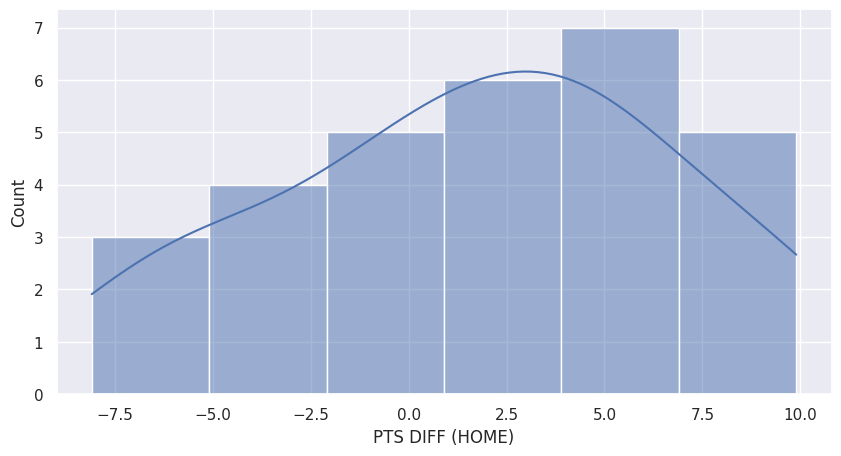

In [ ]:
sns.histplot(x=df['PTS DIFF (HOME)'],kde=True)
plt.show()

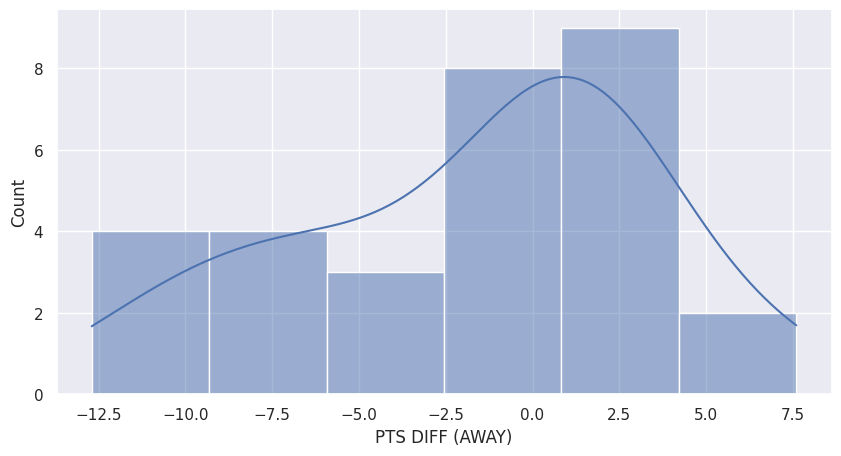

In [ ]:
sns.histplot(x=df['PTS DIFF (AWAY)'],kde=True)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [5, 3]

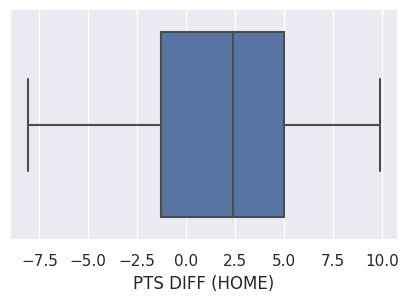

In [ ]:
sns.boxplot(x=df['PTS DIFF (HOME)'])
plt.show()

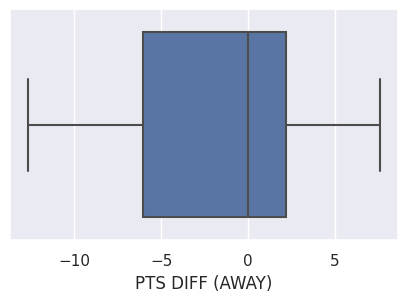

In [ ]:
sns.boxplot(x=df['PTS DIFF (AWAY)'])
plt.show()

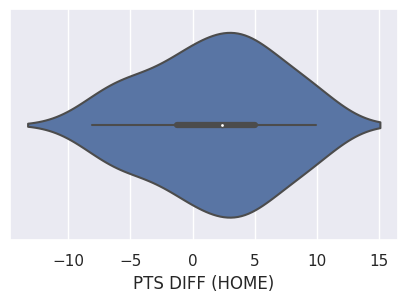

In [ ]:
sns.violinplot(x=df['PTS DIFF (HOME)'])
plt.show()

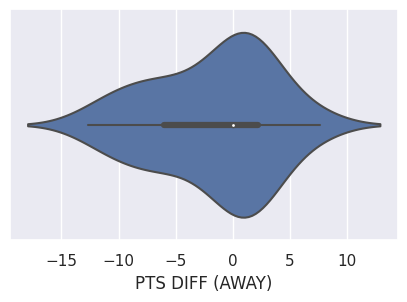

In [ ]:
sns.violinplot(x=df['PTS DIFF (AWAY)'])
plt.show()

**Interpretation:**

From the above graphs, we can see that the median of point difference in home games is 2.5 while that of away games is 0. 

Besides, the highest of mean of point difference in home games is higher, and the lowest mean of point difference in home games is lower.

Also, there is a larger percentage of data for home games has positive mean of point difference.

Therefore, it is very likely that NBA teams are playing better at home than away.

### Appropriate summary statistics (measurements of center and spread) are provided for each sample and the summary statistics are used to describe the data in words 

---

### Similarities and differences between the samples

In [ ]:
print("                              The description of all the data")
print("")
df.describe(include='all')

                              The description of all the data



,RANK,TEAM,GP,PTS DIFF (HOME),PTS DIFF (AWAY),Conference,Playoff
count,30.000000,30,30.0,30.000000,30.000000,30,30
unique,NaN,30,NaN,NaN,NaN,2,2
top,NaN,Atlanta,NaN,NaN,NaN,East,True
freq,NaN,1,NaN,NaN,NaN,15,16
mean,15.500000,NaN,82.0,1.733333,-1.723333,NaN,NaN
std,8.803408,NaN,0.0,5.095795,5.181644,NaN,NaN
min,1.000000,NaN,82.0,-8.100000,-12.700000,NaN,NaN
25%,8.250000,NaN,82.0,-1.275000,-6.050000,NaN,NaN
50%,15.500000,NaN,82.0,2.400000,0.000000,NaN,NaN
75%,22.750000,NaN,82.0,5.000000,2.175000,NaN,NaN


In [ ]:
print("                 Basic information of two groups of data")
print("")
df.describe(include='float').round(4).T


                 Basic information of two groups of data



,count,mean,std,min,25%,50%,75%,max
PTS DIFF (HOME),30.0,1.7333,5.0958,-8.1,-1.275,2.4,5.000,9.9
PTS DIFF (AWAY),30.0,-1.7233,5.1816,-12.7,-6.050,0.0,2.175,7.6


**Mean:**

$\mu_A\ = 1.7333$

$\mu_B\ = -1.7233$


> It shows that the home teams are more likely to score more than the away teams.

**Standard deviation:**

Home: 5.0958

Away: 5.1816

> It shows that the mean points difference in away games are more spreaded.



**Minimum**

Home: -8.1

Away: -12.7


> It shows that away games have lower mean point difference (perform worse)






**Maximum:**

Home: 9.9

Away: 7.6



>  It shows that home games have higher mean point difference (perform better)

**Median:**

Home: 2.4

Away: 0.0

> It shows that there is a larger percentage of teams have a positive mean point difference in home games that away games.

## Verifying Necessary Data Conditions

###**Normality:** 

The data should be approximately normally distributed. 

This condition can be checked by QQ plots.



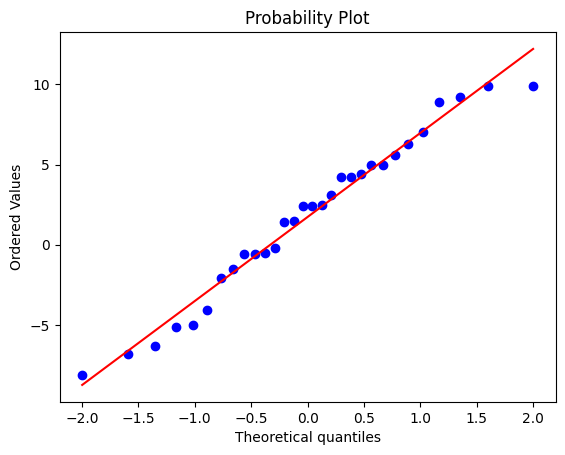

In [10]:
dataHome = df["PTS DIFF (HOME)"]
stats.probplot(dataHome, dist="norm", plot=plt)
plt.show()

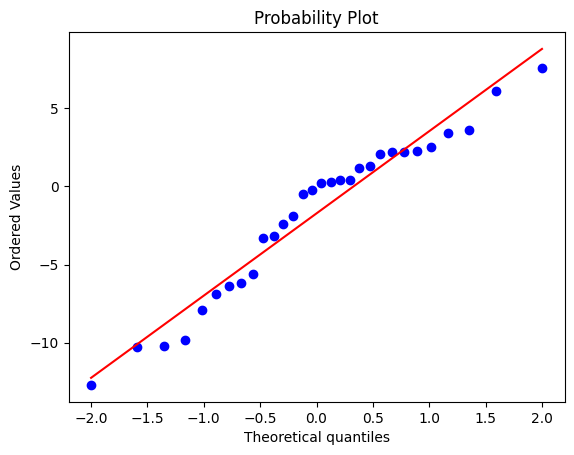

In [11]:
dataAway = df["PTS DIFF (AWAY)"]
stats.probplot(dataAway, dist="norm", plot=plt)
plt.show()

**Interpretation:**

As the points at both QQ plot are approximately lying on the stright line from normal distribution, and they are not deviate significantly from it.

Therefore, the data is normal distributed.

###**Independence:**

The sample should be independent. 

This means that the value of one observation should not affect the value of another observation.

The mean point difference for NBA teams while playing home games and away games can be considered independent.

It is because the value of one observation does not affect the value of another observation. So, it means that the point difference for one team in one game should not affect the point difference for another team in another game.

To be more specific, the mean point difference for NBA teams while playing home games and away games are independent because each game is a separate event with its own set of circumstances and conditions. The performance of a team in one game is not affecting of their performance in another game.

###**Equality of variances:**

The variances of mean point difference for home games and away games are supposed to be equal.

In [25]:
v1 = (df['PTS DIFF (HOME)'].std())**2
v2 = df['PTS DIFF (AWAY)'].std()**2

print(f"The variance for the mean point difference for home games is {v1:.5f}.")
print(f"The variance for the mean point difference for away games is {v2:.5f}.")

The variance for the mean point difference for home games is 25.96713.
The variance for the mean point difference for away games is 26.84944.


**Interpretation:**

From the above, we can conclude that the variance for the mean point difference for home games and away games are not equal.

## Conducting a Hypothesis Test

Let $\delta$ denotes the mean of difference between points difference in home games and away games, then the hypotheses are stated as follows:

$\mu_A$: Mean Points Difference in home games

$\mu_B$: Mean Points Difference in away games


$H_0: \delta = \mu_B - \mu_A = 0$

$H_A: \delta = \mu_A - \mu_B > 0$

This hypothesis testing is a two-sample t-test.


---


The test statistic is
\begin{equation}
T = \frac{\bar d - d_0}{\sqrt{s_1^2/{n_1}+{s_2^2/n_2}}} \sim t(n-1),
\end{equation}

where $\bar d = \frac{1}{n} \sum d_i = \frac{1}{n} \sum (x_i^A - x_i^B)$, $x_i^A$ and $x_i^B$ are the mean point difference for home games and away games, respectively. 

In this example, $d_0 = 0$, $n= 30$

In [44]:
meanHome = df['PTS DIFF (HOME)'].mean()
meanAway = df['PTS DIFF (AWAY)'].mean()

d_bar = meanHome - meanAway
s1 = df['PTS DIFF (HOME)'].std()
s2 = df['PTS DIFF (AWAY)'].std()
n1 = 30
n2 = 30

sample1 = df['PTS DIFF (HOME)']
sample2 = df['PTS DIFF (AWAY)']

t = (d_bar)/((s1**2/n1)+(s2**2/n2))**(1/2)
print(f'The test statistic value is {t:.4}')

t_statistic, p_value = ttest_ind(sample1, sample2)

#print(f"The t-value is {t_statistic:.5f}")
print(f"The p-value is {p_value:.5f}")

The test statistic value is 2.605
The p-value is 0.01165


**Interpretation**

When the null hypothesis is true ($\delta = 0$), the probability of obtaining the test statistic value above or equal to 2.605 is about 0.01165.


Using a common significant level: $\alpha = 0.05$:

Since the p-value < $\alpha$, we reject $H_0$.

At the 0.05 level of significance, the p-value is less than the significant level $\alpha = 0.05$, then we reject the null hypothesis and claim that the mean point difference in home games is higher that of away games.

Since I rejected the null hypothesis based on the p-value being less than the significance level of 0.05, there is a possibility that I could have made a Type I error. 

A Type I error occurs when the null hypothesis is rejected when it is actually true. Even though the test indicates that there is a significant difference between the mean point difference in home games and away games, in reality there may be no difference. 

The probability of making a Type I error is equal to the significance level of the test, which in this case is 0.05. This means that there is a 5% chance that I could have made a Type I error and rejected the null hypothesis when it is actually true, which means the mean point difference in home games may not be higher that of away games.

## Summary

### You summarize your project and include some mention of how you came up with your idea, how you collected your data, and what you found when you explored and analyzed your data.

From the data, I found that the mean point difference at home games is generally higher that away games. 

To sum up, we can conclude that NBA teams are performing better in home games than away games.

---

As a NBA fans, there are always some commentor or NBA players claim that they usually play better at home games that away games. 

Therefore, I want to have a test to analyse is there any statistical supoort for the statement.

---

I search the data set online.

##### There is a interesting point is that the mean point difference at home games as well as away games for playoff teams are both positive, while that of non-playoff teams are both negative.

It prove that a team have to perform well at home games and away games in order to get more wins and get into playoff.

In [48]:
print("Home Games' Points Difference per game of Playoff Teams")
print(df.groupby('Playoff')['PTS DIFF (HOME)'].mean())

Home Games' Points Difference per game of Playoff Teams
Playoff
False   -2.171429
True     5.150000
Name: PTS DIFF (HOME), dtype: float64


In [49]:
print("Away Games' Points Difference per game of Playoff Teams")
print(df.groupby('Playoff')['PTS DIFF (AWAY)'].mean())

Away Games' Points Difference per game of Playoff Teams
Playoff
False   -5.528571
True     1.606250
Name: PTS DIFF (AWAY), dtype: float64


### You discuss any shortcomings of the methods you used to gather data and why you feel these are shortcomings. 

Only data from 2021-2022 season is included. More data can be included to increase the sample size and the accuracy. 

However, I think the test result will be the same even when the sample size is increased, as home teams are likely to perform better on both offensive and defensive side, i.e. having higher points difference (per game) in home games than away games.

It is because players are more familiar with their home court and there are more fans supporting the home team.

###You talk about how you would do the project differently if you were to do it over again

I would gather data for each NBA team, and analyse their mean point difference in home games and away games. 

It is better to analyse is there any difference for each team, not just only a general picture. 

It can be more specific. For example, I can compare the mean point difference between divisions, Western Conference and Eastern Conference, or playoff and non-playoff teams.